Matriz de Confusão - Base de Representação:
[[8 1 0]
 [0 9 2]
 [0 5 5]]

Relatório de Classificação - Base de Representação:
              precision    recall  f1-score   support

      banana       1.00      0.89      0.94         9
     laranja       0.60      0.82      0.69        11
        maca       0.71      0.50      0.59        10

    accuracy                           0.73        30
   macro avg       0.77      0.74      0.74        30
weighted avg       0.76      0.73      0.73        30



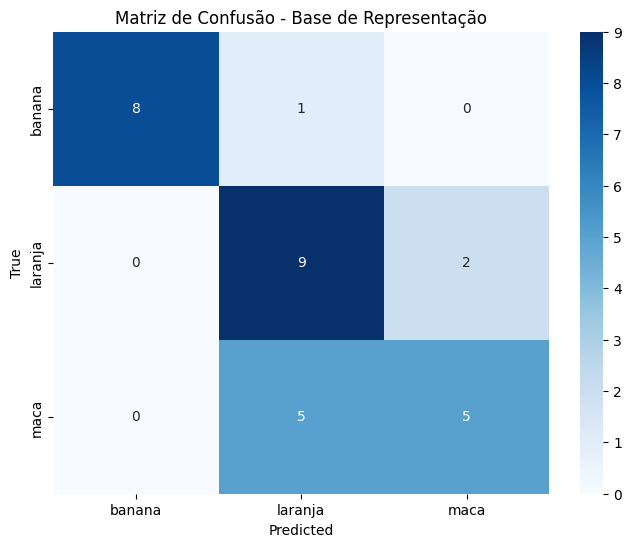

Matriz de Confusão - Base de Descrição:
[[6 0 3]
 [0 6 5]
 [0 4 6]]

Relatório de Classificação - Base de Descrição:
              precision    recall  f1-score   support

      banana       1.00      0.67      0.80         9
     laranja       0.60      0.55      0.57        11
        maca       0.43      0.60      0.50        10

    accuracy                           0.60        30
   macro avg       0.68      0.60      0.62        30
weighted avg       0.66      0.60      0.62        30



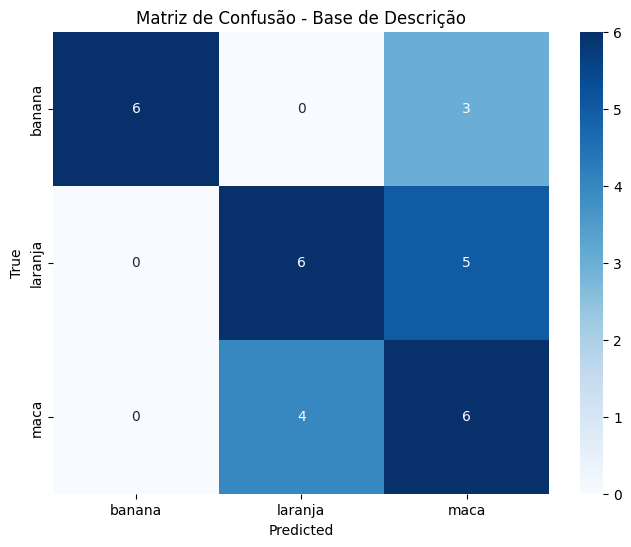

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Corrigir o problema de núcleos físicos para o joblib
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Defina o número de núcleos desejado

# Caminhos de entrada
output_representation_csv = "representation_base.csv"
output_description_csv = "description_base.csv"

# Função para carregar e preparar os dados da base de representação
def load_representation_data(csv_path):
    """Carrega e prepara os dados da base de representação."""
    df = pd.read_csv(csv_path)

    # Converter ChainCode e Signature de string para listas
    df["ChainCode"] = df["ChainCode"].apply(eval)
    df["Signature"] = df["Signature"].apply(eval)

    # Normalizar as assinaturas para o mesmo tamanho (truncar ou preencher com zeros)
    max_length = max(len(sig) for sig in df["Signature"])
    df["Signature"] = df["Signature"].apply(lambda sig: sig[:max_length] + [0] * (max_length - len(sig)))

    # Usar apenas a assinatura como feature
    X = np.array(df["Signature"].tolist())
    y = df["Category"].values
    
    return X, y

# Função para carregar e preparar os dados da base de descrição
def load_description_data(csv_path):
    """Carrega e prepara os dados da base de descrição."""
    df = pd.read_csv(csv_path)

    # Usar os descritores como features
    features = ["Perimeter", "Area", "BoundingBoxRatio", "Circularity", "HuMoment1", "HuMoment2", "HuMoment3"]
    X = df[features].values
    y = df["Category"].values
    
    return X, y

# Função para treinar e avaliar o modelo k-NN
def train_and_evaluate_knn(X, y, n_neighbors=7):
    """Treina e avalia um modelo k-NN usando os dados fornecidos."""
    # Dividir os dados em treino e teste (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treinar o modelo k-NN com n_jobs=1 para evitar processamento paralelo
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=1)
    knn.fit(X_train, y_train)

    # Prever os rótulos no conjunto de teste
    y_pred = knn.predict(X_test)

    # Avaliar o modelo
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=np.unique(y))

    return cm, report

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, labels, title):
    """Plota a matriz de confusão com anotações."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Carregar os dados da base de representação
X_representation, y_representation = load_representation_data(output_representation_csv)
# Avaliar k-NN com 7 vizinhos na base de representação
cm_representation, report_representation = train_and_evaluate_knn(X_representation, y_representation, n_neighbors=7)
# Exibir resultados
print("Matriz de Confusão - Base de Representação:")
print(cm_representation)
print("\nRelatório de Classificação - Base de Representação:")
print(report_representation)
plot_confusion_matrix(cm_representation, labels=np.unique(y_representation), title="Matriz de Confusão - Base de Representação")

# Carregar os dados da base de descrição
X_description, y_description = load_description_data(output_description_csv)
# Avaliar k-NN com 7 vizinhos na base de descrição
cm_description, report_description = train_and_evaluate_knn(X_description, y_description, n_neighbors=7)
# Exibir resultados
print("Matriz de Confusão - Base de Descrição:")
print(cm_description)
print("\nRelatório de Classificação - Base de Descrição:")
print(report_description)
plot_confusion_matrix(cm_description, labels=np.unique(y_description), title="Matriz de Confusão - Base de Descrição")
